In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
## Set the confidence coefficient
α = 0.05

In [5]:
stats.norm.ppf(0.975)

1.959963984540054

In [6]:
stats.t(49).ppf(0.975)

2.009575234489209

## Simulate Data for a Confidence Interval of a Normal Population

In [7]:
## True population dist. N(7.3, 1)
μ = 7.3
σ = 1.0

In [8]:
n = 50
x = np.random.normal(loc=μ, scale=σ, size = n)

In [9]:
x

array([6.37828126, 8.10199017, 8.05922468, 6.63173228, 5.53371244,
       6.6133967 , 6.13498065, 8.18568971, 8.44897513, 5.83300889,
       7.24829727, 6.00901502, 7.99076073, 8.2674287 , 6.95324835,
       7.10973469, 7.7951459 , 6.43580099, 6.8414949 , 7.21759313,
       7.4216089 , 8.4466211 , 7.5703737 , 7.04378566, 8.27448105,
       5.49365176, 8.68090808, 7.8787562 , 8.14027511, 5.376466  ,
       8.04933379, 6.25910045, 7.11002944, 8.71401044, 5.9477775 ,
       7.73167812, 8.30126119, 8.36121507, 6.31503797, 7.98058818,
       8.55661073, 8.26155208, 7.61795118, 8.98354814, 9.03716133,
       5.41258274, 9.39959552, 7.52728388, 8.02071588, 7.68045905])

In [10]:
x̄ = np.mean(x)

In [12]:
x̄

7.427678636246844

In [16]:
s = np.std(x, ddof=1)
s

1.0505879089793635

In [25]:
α = 0.1
z_crit = stats.norm.ppf(1. - α / 2.)

In [26]:
z_crit

1.6448536269514722

In [27]:
ci = (x̄ - z_crit * s / np.sqrt(n), x̄ + z_crit * s / np.sqrt(n))

In [28]:
ci

(7.373032475529127, 7.48232479696456)

## Confidence Interval for Population Proportion

In [19]:
## "True" Binomial proportion who is on #teamwillsmith
θ = .57

In [20]:
n = 1_000
y = np.random.binomial(n=1, p=θ, size=n)

In [22]:
y[:100]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [23]:
ȳ = np.mean(y)

In [24]:
ȳ

0.553

In [29]:
α = 0.05
z_crit = stats.norm.ppf(1. - α / 2.)

In [30]:
## Must remember the formula for the variance/std dev of a binomial proportion 
s = np.sqrt((ȳ*(1.-ȳ)) / n)
s

0.01572230899073034

In [31]:
ci_y = (ȳ - z_crit * s, ȳ + z_crit * s), 

In [32]:
ci_y

((0.5221848406243583, 0.5838151593756418),)

## A First Peek at the Bootstrap

In [33]:
x[:10]

array([6.37828126, 8.10199017, 8.05922468, 6.63173228, 5.53371244,
       6.6133967 , 6.13498065, 8.18568971, 8.44897513, 5.83300889])

In [34]:
## The number of bootstrap repititions
B = 10_000

In [35]:
## Set up an array to store the bootstrap point estimates from the repititions
xboot = np.zeros(B)

In [40]:
## A single bootstrap sample
n = x.shape[0]
xboot_test = np.random.choice(x, size=n)

In [41]:
np.mean(xboot_test)

7.49685097414201

In [43]:
## To operationalize the (iid) bootstrap, loop over the repeated sampling
for b in range(B):
    xb = np.random.choice(x, size=n)
    xboot[b] = np.mean(xb)

(array([  12.,  100.,  540., 1578., 2764., 2840., 1596.,  482.,   80.,
           8.]),
 array([6.85745271, 6.97164332, 7.08583393, 7.20002453, 7.31421514,
        7.42840575, 7.54259636, 7.65678697, 7.77097758, 7.88516818,
        7.99935879]),
 <BarContainer object of 10 artists>)

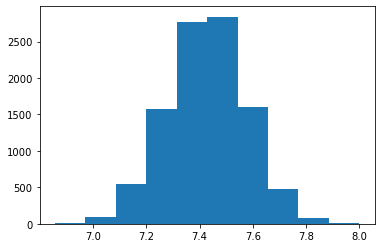

In [44]:
plt.hist(xboot)

In [46]:
xboot_s = pd.Series(xboot)

<AxesSubplot:ylabel='Density'>

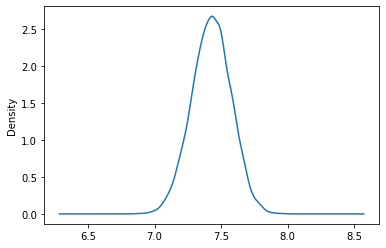

In [47]:
xboot_s.plot.kde()

In [48]:
(xboot.mean(), xboot.std(ddof=1))

(7.426303216872392, 0.14717338993430776)